
# About Delhivery : 

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.


- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


# Business Problem Statement  :


- The company wants to understand and process the data coming out of data engineering pipelines:

>• Clean, sanitize and manipulate data to get useful features out of raw fields

>• Make sense out of the raw data and help the data science team to build forecasting models on it.


### Column Profiling:

- data :  tells whether the data is testing or training data


- trip_creation_time : Timestamp of trip creation
- route_schedule_uuid : Unique Id for a particular route schedule
- route_type : Transportation type 
    - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles (carts)
    
- trip_uuid : Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center : Source ID of trip origin
- source_name : Source Name of trip origin
- destination_cente : Destination ID
- destination_name : Destination Name
- od_start_time : Trip start time
- od_end_time : Trip end time
- start_scan_to_end_scan : Time taken to deliver from source to destination
- is_cutoff : Unknown field
- cutoff_factor : Unknown field
- cutoff_timestamp : Unknown field
- actual_distance_to_destination : Distance in Kms between source and destination warehouse
- actual_time : Actual time taken to complete the delivery (Cumulative)
- osrm_time : An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance : An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor : Unknown field
- segment_actual_time : This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time : This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance : This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor : Unknown field







##### Concept Used:

    Feature Creation
    Relationship between Features
    Column Normalization /Column Standardization
    Handling categorical values
    Missing values - Outlier treatment / Types of outliers
    
    


- Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination).
- Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?


- Hint: You can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their 
1. Trip_uuid, Source ID and Destination ID 
2. Further aggregate on the basis of just Trip_uuid.
- You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.


- #### Basic data cleaning and exploration:

    > - Handle missing values in the data.
    > - Analyze the structure of the data.
    > - Try merging the rows using the hint mentioned above.
    
    
- #### Build some features to prepare the data for actual analysis. Extract features from the below fields:
    > - Destination Name: Split and extract features out of destination. City-place-code (State)
    > - Source Name: Split and extract features out of destination. City-place-code (State)
    > - Trip_creation_time: Extract features like month, year and day etc
    
- #### In-depth analysis and feature engineering:
    > - Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
    > - Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
    > - Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    > -  Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    > - Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    > - Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    > - Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
    > - Handle the outliers using the IQR method.
    > - Do one-hot encoding of categorical variables (like route_type)
    > - Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.


    Define Problem Statement and perform Exploratory Data Analysis (10 points)

            Definition of problem (as per given problem statement with additional views)

            Observations on shape of data, data types of all the attributes,
            conversion of categorical attributes to 'category' (If required),
            missing value detection, statistical summary.

            Visual Analysis 
            (distribution plots of all the continuous variable(s),
            boxplots of all the categorical variables)

            Insights based on EDA

                Comments on range of attributes, outliers of various attributes
                Comments on the distribution of the variables and relationship between them
                Comments for each univariate and bivariate plot

    Feature Creation (10 Points)

    Merging of rows and aggregation of fields (10 Points)

    Comparison & Visualization of time and distance fields (10 Points)

    Missing values Treatment & Outlier treatment (10 Points)

    Checking relationship between aggregated fields (10 Points)

    Handling categorical values (10 Points)

    Column Normalization /Column Standardization (10 Points)

    Business Insights (10 Points) - 
        Should include patterns observed in the data along with what you can infer from it. Eg:
            Check from where most orders are coming from (State, Corridor etc)
            Busiest corridor, avg distance between them, avg time taken
            
            
    Recommendations (10 Points) -
    Actionable items for business.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
# import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("delhivery_data.txt")

In [4]:
df.sample(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
121744,training,2018-09-13 01:52:41.309789,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153680356130952302,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-13 01:52:41.309789,2018-09-15 03:14:00.210257,2961.0,True,968,2018-09-13 22:18:30,974.970870,1728.0,957.0,1315.6505,1.805643,48.0,22.0,31.9122,2.181818
61190,training,2018-09-26 17:39:34.330564,thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...,FTL,trip-153798357433033219,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-26 17:39:34.330564,2018-09-28 22:58:54.947592,3199.0,True,1210,2018-09-27 13:35:38,1210.441856,1997.0,1119.0,1491.4392,1.784629,41.0,28.0,39.8020,1.464286
101846,training,2018-09-14 11:39:11.273491,thanos::sroute:727b9433-49db-4b56-b560-c7c8fe2...,FTL,trip-153692515127324069,IND144001AAC,Jalandhar_Sodal Road (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-14 23:40:11.792119,2018-09-15 04:01:24.477113,261.0,True,22,2018-09-15 02:04:15,22.151358,34.0,22.0,31.0609,1.545455,34.0,22.0,31.0609,1.545455
42593,training,2018-09-19 17:34:56.509698,thanos::sroute:a1b25549-1e77-498f-8538-00292e5...,FTL,trip-153737849650943585,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND751002AAB,Bhubaneshwar_Hub (Orissa),2018-09-19 17:34:56.509698,2018-09-21 11:48:48.982970,2533.0,True,792,2018-09-20 13:59:17,793.131965,1278.0,625.0,883.6370,2.044800,26.0,18.0,26.5933,1.444444
135386,training,2018-09-18 03:40:52.436626,thanos::sroute:3be4a224-4b1e-447a-a0da-a71d27f...,Carting,trip-153724205243639560,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND560002AAA,Bengaluru_KHRoad_I (Karnataka),2018-09-18 03:40:52.436626,2018-09-18 05:48:50.191282,127.0,True,9,2018-09-18 04:51:19,11.557796,42.0,19.0,17.9902,2.210526,42.0,19.0,17.9902,2.210526
121835,test,2018-09-30 06:43:02.404973,thanos::sroute:45807192-ccd2-4f20-a7af-efa3524...,FTL,trip-153828978240471019,IND244901AAB,Rampur_RoshnBgh_I (Uttar Pradesh),IND244221AAA,Amroha_SamitiRd_D (Uttar Pradesh),2018-09-30 18:03:51.048846,2018-10-01 01:14:58.088735,431.0,False,56,2018-09-30 23:08:31,56.051444,102.0,99.0,90.0937,1.030303,41.0,64.0,56.2937,0.640625
119796,training,2018-09-20 18:05:21.039566,thanos::sroute:49f6ef3a-a09b-4eb4-8166-0a846a1...,Carting,trip-153746672103930999,IND683511AAA,Aluva_Peedika_H (Kerala),IND680012AAA,Arimbur_Veluthur_D (Kerala),2018-09-20 18:05:21.039566,2018-09-21 01:02:36.281922,417.0,True,27,2018-09-21 00:01:22,27.975411,54.0,38.0,37.6001,1.421053,10.0,8.0,10.7457,1.250000
16762,training,2018-09-15 02:48:34.107030,thanos::sroute:2d2cdf5e-6ea1-4525-833e-cae6a1a...,Carting,trip-153697971410675506,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND110064AAA,Delhi_Mayapuri_PC (Delhi),2018-09-15 02:48:34.107030,2018-09-15 06:11:56.747933,203.0,True,27,2018-09-15 04:54:32,27.111016,69.0,39.0,36.7208,1.769231,14.0,14.0,15.0087,1.000000
25612,test,2018-10-03 22:46:43.685043,thanos::sroute:bf427bc4-6fe3-4868-bc71-5c55d4c...,Carting,trip-153860680368478736,IND210501AAB,Bewar_BndhuTRH_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-04 05:08:20.521723,2018-10-04 08:43:01.076036,214.0,True,54,2018-10-04 06:32:42,57.325220,125.0,69.0,92.1242,1.811594,29.0,14.0,17.4717,2.071429
96355,training,2018-09-12 06:58:14.851871,thanos::sroute:f41c4e69-9b78-4737-81ce-58442d6...,Carting,trip-153673549485156899,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND560300AAA,Bengaluru_KGAirprt_HB (Karnataka),2018-09-12 06:58:14.851871,2018-09-12 11:15:35.062340,257.0,False,42,2018-09-12 08:31:29,42.600070,164.0,58.0,53.1946,2.827586,38.0,13.0,1

In [5]:
df.shape

(144867, 24)

In [6]:
# 144,867 total Records 
# 24 columns 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## changing datatype of date and time columns 

In [8]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

## Extracting Trip Creation day from Trip Creation time : 

In [9]:
# data is given from Septemebr and October 2018.

In [10]:
df["trip_creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: trip_creation_time, dtype: int64

In [11]:
df["trip_creation_time"].dt.year.value_counts()

2018    144867
Name: trip_creation_time, dtype: int64

In [12]:
df["trip_creation_day"] = (df["trip_creation_time"].dt.day_name())

In [13]:
df["trip_creation_day"].value_counts()

Wednesday    26732
Thursday     20481
Friday       20242
Tuesday      19961
Saturday     19936
Monday       19645
Sunday       17870
Name: trip_creation_day, dtype: int64

<AxesSubplot:>

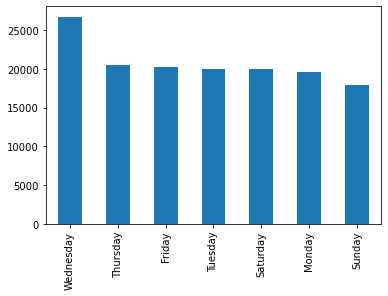

In [14]:
df["trip_creation_day"].value_counts().plot(kind = "bar")

In [15]:
11.96+9.75+10.81+13.02+3.915

49.455000000000005

In [16]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Thursday
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Thursday
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Thursday
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,Thursday
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,

 # Understanding Feature importance and designing Flow of Analysis : 
    

    factor : actual_time / osrm time 

    
    

    start_time_to_end_time is the time taken when scanned at particular hub after pick-up and before the delivery.
    (given in minutes) : conver into hours. 

    od-start-time : time noted when trip was started 
    od-end-time : time noted when trip was ended .
    (HYPOTHESIS  if time_taken odend-odstart VS start-time-to-end-time)
    
    
    if_cutoff : is the boolean value, becomes False when the order changes from connecting junction.
    
    
    actual_time : actual time taken to complete the delivery (given cumulative )
    OSRM time : expected time given by OSRM engine. (cumulative)
    (cuts off when is-cutoff = false)
    (HYPOTHESIS : if actualtime(observed) is same as OSRM time(expected time))
    
    
    
    segment_actual_time : actual time taken between each trip stops between trip from source to junctions to destinations. 
    segment_osrm_time : OSRM time given 
    (segment times are not cumulative )
    (HYPOTHESIS : if segment actual time is same as segment osrm time)
    
    
    segment factor = segment_actual_time	/   segment_osrm_time
    
                
    
    
    
       
    Actual Distance to destination : given cumulative
    osrm_distance : given cumulative 
    (HYPOTHESIS : if above both are equal )
    
    
    
    
    actual_distance_to_destination
    osrm distnace
    segment osrm distance 
    
    
    





# Extracting Features like city - place - code -state from source and destination name columns : 

In [17]:
df["source_city"] = df["source_name"].str.extract(r'([^_]+)')

In [18]:
df["source_state"] = df["source_name"].str.extract(r'.*\((.*)\).*')

In [19]:
df["source_code"] = (df["source_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]

In [20]:
df["source_place"] = df["source_name"].str.split("_",n=2,expand = True)[1]

In [21]:
df["destination_city"] = df["destination_name"].str.extract(r'([^_]+)')

In [22]:
df["destination_state"] = df["destination_name"].str.extract(r'.*\((.*)\).*')

In [23]:
df["destination_code"] = (df["destination_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]

In [24]:
df["destination_place"] = df["destination_name"].str.split("_",n=2,expand = True)[1]

In [25]:
# Bengaluru                            
# Bangalore

In [26]:
df["source_city"].replace({
    "Bangalore":"Bengaluru"
},inplace=True)

In [27]:
df["destination_city"].replace({
    "Bangalore":"Bengaluru"
},inplace=True)

In [28]:
df["destination_city"].replace({
    "AMD":"Ahmedabad"
},inplace=True)
df["destination_city"].replace({
    "Amdavad":"Ahmedabad"
},inplace=True)

In [29]:
df["source_city"].replace({
    "AMD":"Ahmedabad"
},inplace=True)
df["source_city"].replace({
    "Amdavad":"Ahmedabad"
},inplace=True)

In [30]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]

In [31]:
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

In [32]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat


In [33]:
df["source_center"].str.split()

0         [IND388121AAA]
1         [IND388121AAA]
2         [IND388121AAA]
3         [IND388121AAA]
4         [IND388121AAA]
               ...      
144862    [IND131028AAB]
144863    [IND131028AAB]
144864    [IND131028AAB]
144865    [IND131028AAB]
144866    [IND131028AAB]
Name: source_center, Length: 144867, dtype: object

In [34]:
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )

In [35]:
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )

### converting start_scan_to_end_scan into hours. 

In [36]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60

In [37]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,source_city_state,destination_city_state,source_pincode,destination_pincode
99006,training,2018-09-21 00:50:32.483699,thanos::sroute:9ded028c-c5e5-48f8-90f4-1669fef...,FTL,trip-153749103248348878,IND533106AAA,Rajamundry_AtoNgrRd_I (Andhra Pradesh),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-22 05:31:20.113888,2018-09-23 07:58:22.045999,26.450000,True,242,2018-09-22 10:19:24,246.505824,907.0,199.0,280.2364,4.557789,421.0,18.0,26.3254,23.388889,Friday,Rajamundry,Andhra Pradesh,I,AtoNgrRd,Hyderabad,Telangana,H,Shamshbd,Rajamundry Andhra Pradesh,Hyderabad Telangana,533106,501359
127446,training,2018-09-16 16:55:12.917962,thanos::sroute:d55366e7-ab8c-4502-b81a-db3bb65...,FTL,trip-153711691516777328,IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-17 01:28:32.881083,2018-09-17 05:38:39.280476,4.166667,False,39,2018-09-17 02:13:24,39.619626,69.0,57.0,46.1407,1.210526,33.0,26.0,24.5270,1.269231,Sunday,Bengaluru,Karnataka,HB,Bomsndra,Bengaluru,Karnataka,H,Nelmngla,Bengaluru Karnataka,Bengaluru Karnataka,560099,562132
33309,test,2018-09-30 19:03:22.959552,thanos::sroute:69409580-4bf0-4bbf-96fe-9e7bc65...,FTL,trip-153833420295929830,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-30 23:27:10.849320,2018-10-02 07:37:39.836185,32.166667,True,352,2018-10-01 21:41:57,353.340017,590.0,321.0,425.0489,1.838006,104.0,18.0,25.4658,5.777778,Sunday,Gurgaon,Haryana,HB,Bilaspur,Pune,Maharashtra,H,Tathawde,Gurgaon Haryana,Pune Maharashtra,000000,411033
112623,training,2018-09-21 03:20:10.213665,thanos::sroute:e9b2d11d-a4ff-4744-bff5-cdabe54...,Carting,trip-153750001021330601,IND212402AAA,Phulpur_Shekhpur_D (Uttar Pradesh),IND211002AAB,Allahabad_Central_H_1 (Uttar Pradesh),2018-09-21 07:50:49.025574,2018-09-22 02:27:49.208934,18.616667,False,42,2018-09-21 08:23:26,42.039107,1071.0,36.0,49.3971,29.750000,22.0,3.0,5.2074,7.333333,Friday,Phulpur,Uttar Pradesh,D,Shekhpur,Allahabad,Uttar Pradesh,H_1,Central,Phulpur Uttar Pradesh,Allahabad Uttar Pradesh,212402,211002
53137,training,2018-09-18 18:00:47.866400,thanos::sroute:ef440d0b-5e79-4fe0-a7de-1cfa8c2...,FTL,trip-153729364786613267,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 18:48:31.176194,2018-09-21 12:53:41.422123,18.083333,True,308,2018-09-21 03:13:52,308.008167,578.0,375.0,409.4421,1.541333,25.0,28.0,22.5007,0.892857,Tuesday,Bhopal,Madhya Pradesh,H,Trnsport,Gurgaon,Haryana,HB,Bilaspur,Bhopal Madhya Pradesh,Gurgaon Haryana,462022,000000


In [38]:
df.isna().sum()

data                                  0
trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                         293
destination_center                    0
destination_name                    261
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                      0
actual_distance_to_destination        0
actual_time                           0
osrm_time                             0
osrm_distance                         0
factor                                0
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                        0
trip_creation_day                     0


## Top 10 source and destination city : 

In [39]:
# df["destination_city"].value_counts().sort_values(ascending=False).head(10)

In [40]:
# df["source_city"].value_counts().sort_values(ascending=False).head(10)

## Top 10 source and Destination States :                         

In [41]:
# df["source_state"].value_counts().sort_values(ascending=False).head(10)

In [42]:
# df["destination_state"].value_counts().sort_values(ascending=False).head(10)

## Top 10 source and Destination Code :                         

In [43]:
# df["source_code"].value_counts().sort_values(ascending=False).head(10)

In [44]:
# df["destination_code"].value_counts().sort_values(ascending=False).head(10)

In [45]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,16.021050,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,17.283546,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,0.333333,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2.683333,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,7.483333,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,27.233333,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,131.633333,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [46]:
df.describe(include="object")

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,cutoff_timestamp,trip_creation_day,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,source_city_state,destination_city_state,source_pincode,destination_pincode
count,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144574,144574,129924,142467,144606,144606,129038,142165,144574,144606,144867,144867
unique,2,1504,2,14817,1508,1498,1481,1468,93180,7,1260,31,48,1178,1255,32,48,1154,1268,1261,1390,1384
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-24 05:19:20,Wednesday,Gurgaon,Haryana,HB,Bilaspur,Gurgaon,Karnataka,H,Bilaspur,Gurgaon Haryana,Gurgaon Haryana,000000,000000
freq,104858,1812,99660,101,23347,23347,15192,15192,40,26732,23665,27499,41177,23464,15393,21065,34584,15363,23665,15393,25460,16382


In [47]:
data = df.copy()

In [48]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'source_city', 'source_state', 'source_code',
       'source_place', 'destination_city', 'destination_state',
       'destination_code', 'destination_place', 'source_city_state',
       'destination_city_state', 'source_pincode', 'destination_pincode'],
      dtype='object')

In [49]:
data.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,source_city_state,destination_city_state,source_pincode,destination_pincode
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat,388121,388620
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat,388121,388620


In [50]:
data.drop(["trip_creation_time",'source_center',"source_name","destination_center","destination_name","cutoff_timestamp"],axis = 1,inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   route_schedule_uuid             144867 non-null  object        
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   od_start_time                   144867 non-null  datetime64[ns]
 5   od_end_time                     144867 non-null  datetime64[ns]
 6   start_scan_to_end_scan          144867 non-null  float64       
 7   is_cutoff                       144867 non-null  bool          
 8   cutoff_factor                   144867 non-null  int64         
 9   actual_distance_to_destination  144867 non-null  float64       
 10  actual_time                     144867 non-null  float64

In [52]:
((data.isna().sum())/len(data))*100

data                               0.000000
route_schedule_uuid                0.000000
route_type                         0.000000
trip_uuid                          0.000000
od_start_time                      0.000000
od_end_time                        0.000000
start_scan_to_end_scan             0.000000
is_cutoff                          0.000000
cutoff_factor                      0.000000
actual_distance_to_destination     0.000000
actual_time                        0.000000
osrm_time                          0.000000
osrm_distance                      0.000000
factor                             0.000000
segment_actual_time                0.000000
segment_osrm_time                  0.000000
segment_osrm_distance              0.000000
segment_factor                     0.000000
trip_creation_day                  0.000000
source_city                        0.202254
source_state                       0.202254
source_code                       10.314979
source_place                    

In [53]:

data.nunique()

data                                   2
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
trip_creation_day                      7
source_city                         1260
source_state                          31
source_code                           48
source_place                        1178
destination_city                    1255
destination_stat

In [54]:
# data.count()

In [55]:
data.columns

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'is_cutoff',
       'cutoff_factor', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_day', 'source_city', 'source_state', 'source_code',
       'source_place', 'destination_city', 'destination_state',
       'destination_code', 'destination_place', 'source_city_state',
       'destination_city_state', 'source_pincode', 'destination_pincode'],
      dtype='object')

In [56]:
# data.drop(["trip_creation_time","source_name","destination_name"],axis=1,inplace=True)

In [57]:
data.head(1)

,data,route_schedule_uuid,route_type,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,source_city_state,destination_city_state,source_pincode,destination_pincode
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat,388121,388620


In [58]:
# uuid :  Universally unique identifier

In [59]:
#  Transportation type
data["route_type"].value_counts()

# FTL – Full Truck Load: FTL shipments get to the destination sooner, 
   #  as the truck is making no other pickups or drop-offs along the way
#Carting: Handling system consisting of small vehicles (carts)

FTL        99660
Carting    45207
Name: route_type, dtype: int64

<AxesSubplot:>

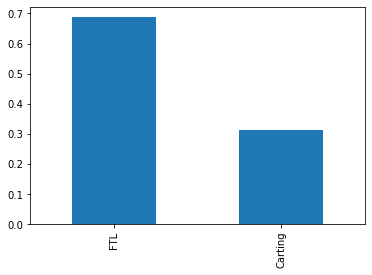

In [60]:
data["route_type"].value_counts(normalize=True).plot(kind = "bar")

### trip  : souce - destination centres

In [61]:
data["trip_uuid"].value_counts()
# Unique ID given to a particular trip (A trip may include different source and destination centers)

trip-153811219535896559    101
trip-153846035308581166    101
trip-153802363942560700    101
trip-153759210483476123    101
trip-153819749763881430    101
                          ... 
trip-153807169820740041      1
trip-153815586768995663      1
trip-153823299365493206      1
trip-153733174477629450      1
trip-153694467298919626      1
Name: trip_uuid, Length: 14817, dtype: int64

In [62]:
# total 14817 unique trip_uuid are given in dataset : 

### perticular route schedule

In [63]:
data["route_schedule_uuid"].value_counts()
# Unique Id for a particular route schedule

thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:036f372d-28d8-4d19-877c-6277077ad09e       1
thanos::sroute:e00eb6aa-d792-4b28-81fa-fdee413ef326       1
thanos::sroute:889b9cf5-da6a-48ce-b3bd-6983c8090164       1
thanos::sroute:404cbabf-d2a5-4e46-bf79-8b3c518f082b       1
Name: route_schedule_uuid, Length: 1504, dtype: int64

In [64]:
# total 1504 unique routes are there. 

# time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan

In [65]:
data["time_taken_btwn_odstart_and_od_end"] = ((data["od_end_time"]-data["od_start_time"])/pd.Timedelta(1,unit="hour"))

In [66]:
# (data["od_end_time"]-data["od_start_time"])

In [67]:
data.drop(["od_end_time","od_start_time"],axis = 1 , inplace=True)

In [68]:
data["time_taken_btwn_odstart_and_od_end"]

0         1.436894
1         1.436894
2         1.436894
3         1.436894
4         1.436894
            ...   
144862    7.128106
144863    7.128106
144864    7.128106
144865    7.128106
144866    7.128106
Name: time_taken_btwn_odstart_and_od_end, Length: 144867, dtype: float64


### Comparing the difference between `od_start_time - od_end_time`  and `start_scan_to_end_scan`.
### hypothesis testing/ Visual analysis :

    H0:  mean od-start-time and end time difference =   start_scan_to_end_scan 
    H0:  mean od-start-time and end time difference !=  start_scan_to_end_scan 

##### aggregating the data as per trip_uuid amd summing up the  all od_durations from different stops during trip : 

In [69]:
(data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique())

trip_uuid
trip-153671041653548748                         [16.65842298, 21.0100736875]
trip-153671042288605164             [2.0463247669444447, 0.9805397955555556]
trip-153671043369099517             [51.662059856388886, 13.910648811388889]
trip-153671046011330457                                 [1.6749155866666667]
trip-153671052974046625    [2.5335485744444446, 1.3423885633333332, 8.096...
                                                 ...                        
trip-153861095625827784                    [2.546464057777778, 1.7540180775]
trip-153861104386292051                                 [1.0098420219444444]
trip-153861106442901555                    [2.895179575833333, 4.1401515375]
trip-153861115439069069    [1.7609491794444445, 0.7362400538888889, 1.035...
trip-153861118270144424                   [1.1155594141666667, 4.7912334425]
Name: time_taken_btwn_odstart_and_od_end, Length: 14817, dtype: object

In [70]:
od_duration = (data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique()).reset_index()

In [71]:
# od_duration

In [72]:
od_duration["time_taken_btwn_odstart_and_od_end"] = od_duration["time_taken_btwn_odstart_and_od_end"].apply(sum) 

In [73]:
od_duration

,trip_uuid,time_taken_btwn_odstart_and_od_end
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14812,trip-153861095625827784,4.300482
14813,trip-153861104386292051,1.009842
14814,trip-153861106442901555,7.035331
14815,trip-153861115439069069,5.808548


In [74]:
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
# start_scan_to_end_scan

In [75]:
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 

In [76]:
start_scan_to_end_scan

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,37.650000
1,trip-153671042288605164,3.000000
2,trip-153671043369099517,65.550000
3,trip-153671046011330457,1.666667
4,trip-153671052974046625,11.950000
...,...,...
14812,trip-153861095625827784,4.283333
14813,trip-153861104386292051,1.000000
14814,trip-153861106442901555,7.016667
14815,trip-153861115439069069,5.783333


<AxesSubplot:xlabel='time_taken_btwn_odstart_and_od_end', ylabel='Density'>

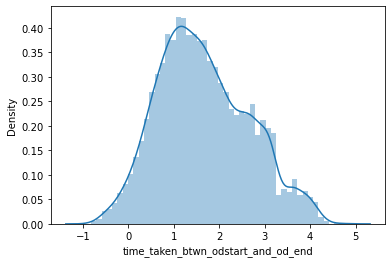

In [77]:
sns.distplot(np.log(od_duration["time_taken_btwn_odstart_and_od_end"]))

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='Density'>

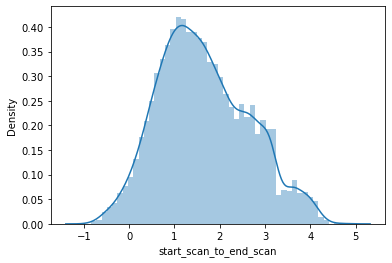

In [78]:
sns.distplot(np.log(start_scan_to_end_scan["start_scan_to_end_scan"]))

In [79]:
# stats.ttest_ind(od_duration["od_duration"],start_scan_to_end_scan["start_scan_to_end_scan"])

In [80]:
stats.ttest_ind(np.log(od_duration["time_taken_btwn_odstart_and_od_end"]),np.log(start_scan_to_end_scan["start_scan_to_end_scan"]))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.4066930332152617, pvalue=0.6842363952379178)

In [81]:
# pvalue  = 0.68 which is way higher than the significance level of 0.05
# we are faild to reject null Hypothesis . 
# we can conclude the od_start and end time difference and Start_scan_to_end_scan times are same. 

In [82]:
data[["trip_uuid","time_taken_btwn_odstart_and_od_end"]].drop_duplicates()["time_taken_btwn_odstart_and_od_end"]

0          1.436894
5          1.819553
10         5.039540
15         1.816370
17         3.260177
            ...    
144834    10.379174
144847     6.564614
144849    10.239925
144854     1.947858
144858     7.128106
Name: time_taken_btwn_odstart_and_od_end, Length: 26369, dtype: float64

In [83]:
data.columns

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_day',
       'source_city', 'source_state', 'source_code', 'source_place',
       'destination_city', 'destination_state', 'destination_code',
       'destination_place', 'source_city_state', 'destination_city_state',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end'],
      dtype='object')

# actual time VS start-scan-end-scan 

In [84]:
actual_time = (data[data["is_cutoff"]==False][["trip_uuid","actual_time"]].groupby("trip_uuid")["actual_time"].sum())/60
actual_time

trip_uuid
trip-153671041653548748    26.033333
trip-153671042288605164     2.383333
trip-153671043369099517    55.783333
trip-153671046011330457     0.983333
trip-153671052974046625     5.683333
                             ...    
trip-153861095625827784     1.383333
trip-153861104386292051     0.350000
trip-153861106442901555     4.700000
trip-153861115439069069     4.400000
trip-153861118270144424     4.583333
Name: actual_time, Length: 14703, dtype: float64

In [85]:
start_scan_to_end_scan = data[data["is_cutoff"]==False][["trip_uuid","start_scan_to_end_scan"]].groupby("trip_uuid")["start_scan_to_end_scan"].sum()
start_scan_to_end_scan

trip_uuid
trip-153671041653548748    37.650000
trip-153671042288605164     3.000000
trip-153671043369099517    65.550000
trip-153671046011330457     1.666667
trip-153671052974046625    11.950000
                             ...    
trip-153861095625827784     4.283333
trip-153861104386292051     1.000000
trip-153861106442901555     7.016667
trip-153861115439069069     5.783333
trip-153861118270144424     5.883333
Name: start_scan_to_end_scan, Length: 14703, dtype: float64

In [86]:
stats.ttest_ind(start_scan_to_end_scan,actual_time)

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=24.2274192024015, pvalue=2.0808010118053942e-128)

In [87]:
# start_scan_to_end_scan is higher than actual time 

# actual_time VS time_taken_btwn_odstart_and_od_end

In [88]:
stats.ttest_ind(od_duration["time_taken_btwn_odstart_and_od_end"],actual_time)

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=24.14602236875122, pvalue=1.4231365890426307e-127)

In [89]:
# timetaken between odstart and end time is   >  higher than actual time 

# `Actual_Time` AND `OSRM time`

## Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [90]:
data.head(1)

,data,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_day,source_city,source_state,source_code,source_place,destination_city,destination_state,destination_code,destination_place,source_city_state,destination_city_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,9,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Thursday,Anand,Gujarat,DC,VUNagar,Khambhat,Gujarat,D,MotvdDPP,Anand Gujarat,Khambhat Gujarat,388121,388620,1.436894


In [91]:
data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["actual_time"].max()

trip_uuid                time_taken_btwn_odstart_and_od_end
trip-153671041653548748  16.658423                             830.0
                         21.010074                             732.0
trip-153671042288605164  0.980540                               47.0
                         2.046325                               96.0
trip-153671043369099517  13.910649                             611.0
                                                               ...  
trip-153861115439069069  1.035253                               51.0
                         1.518130                               90.0
                         1.760949                               60.0
trip-153861118270144424  1.115559                               42.0
                         4.791233                              233.0
Name: actual_time, Length: 26369, dtype: float64

In [92]:
((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["actual_time"].max()).reset_index())

,trip_uuid,time_taken_btwn_odstart_and_od_end,actual_time
0,trip-153671041653548748,16.658423,830.0
1,trip-153671041653548748,21.010074,732.0
2,trip-153671042288605164,0.980540,47.0
3,trip-153671042288605164,2.046325,96.0
4,trip-153671043369099517,13.910649,611.0
...,...,...,...
26364,trip-153861115439069069,1.035253,51.0
26365,trip-153861115439069069,1.518130,90.0
26366,trip-153861115439069069,1.760949,60.0
26367,trip-153861118270144424,1.115559,42.0


In [93]:
((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["actual_time"].max()).reset_index()).groupby("trip_uuid")["actual_time"].sum()

trip_uuid
trip-153671041653548748    1562.0
trip-153671042288605164     143.0
trip-153671043369099517    3347.0
trip-153671046011330457      59.0
trip-153671052974046625     341.0
                            ...  
trip-153861095625827784      83.0
trip-153861104386292051      21.0
trip-153861106442901555     282.0
trip-153861115439069069     264.0
trip-153861118270144424     275.0
Name: actual_time, Length: 14817, dtype: float64

In [94]:
((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["osrm_time"].max()).reset_index()).groupby("trip_uuid")["osrm_time"].sum()

trip_uuid
trip-153671041653548748     743.0
trip-153671042288605164      68.0
trip-153671043369099517    1741.0
trip-153671046011330457      15.0
trip-153671052974046625     117.0
                            ...  
trip-153861095625827784      62.0
trip-153861104386292051      12.0
trip-153861106442901555      54.0
trip-153861115439069069     184.0
trip-153861118270144424      68.0
Name: osrm_time, Length: 14817, dtype: float64

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

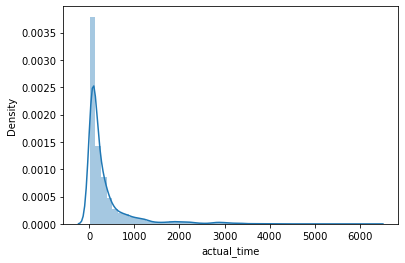

In [95]:
sns.distplot(((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["actual_time"].max()).reset_index()).groupby("trip_uuid")["actual_time"].sum())

In [96]:
osrm_time = ((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["osrm_time"].max()).reset_index()).groupby("trip_uuid")["osrm_time"].sum()

In [97]:
actual_time = ((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["actual_time"].max()).reset_index()).groupby("trip_uuid")["actual_time"].sum()

In [98]:
actual_time

trip_uuid
trip-153671041653548748    1562.0
trip-153671042288605164     143.0
trip-153671043369099517    3347.0
trip-153671046011330457      59.0
trip-153671052974046625     341.0
                            ...  
trip-153861095625827784      83.0
trip-153861104386292051      21.0
trip-153861106442901555     282.0
trip-153861115439069069     264.0
trip-153861118270144424     275.0
Name: actual_time, Length: 14817, dtype: float64

In [99]:
osrm_time

trip_uuid
trip-153671041653548748     743.0
trip-153671042288605164      68.0
trip-153671043369099517    1741.0
trip-153671046011330457      15.0
trip-153671052974046625     117.0
                            ...  
trip-153861095625827784      62.0
trip-153861104386292051      12.0
trip-153861106442901555      54.0
trip-153861115439069069     184.0
trip-153861118270144424      68.0
Name: osrm_time, Length: 14817, dtype: float64

> H0 : actual time <= osrm time

> Ha : actual time > osrm time

In [100]:
stats.ttest_ind(actual_time.sample(5000),osrm_time.sample(5000),alternative='greater')

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=21.574141504096733, pvalue=3.077211166693448e-101)

In [101]:
# stats.ttest_ind(osrm_time.sample(5000),actual_time.sample(5000),alternative='less')

# actual_time VS segment_actual_time

#### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [102]:
actual_time = (data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["actual_time"].max().reset_index()).groupby("trip_uuid")["actual_time"].sum()

In [103]:
actual_time

trip_uuid
trip-153671041653548748    1562.0
trip-153671042288605164     143.0
trip-153671043369099517    3347.0
trip-153671046011330457      59.0
trip-153671052974046625     341.0
                            ...  
trip-153861095625827784      83.0
trip-153861104386292051      21.0
trip-153861106442901555     282.0
trip-153861115439069069     264.0
trip-153861118270144424     275.0
Name: actual_time, Length: 14817, dtype: float64

In [104]:
segment_actual_time=data.groupby("trip_uuid")["segment_actual_time"].sum()

In [105]:
segment_actual_time

trip_uuid
trip-153671041653548748    1548.0
trip-153671042288605164     141.0
trip-153671043369099517    3308.0
trip-153671046011330457      59.0
trip-153671052974046625     340.0
                            ...  
trip-153861095625827784      82.0
trip-153861104386292051      21.0
trip-153861106442901555     281.0
trip-153861115439069069     258.0
trip-153861118270144424     274.0
Name: segment_actual_time, Length: 14817, dtype: float64

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

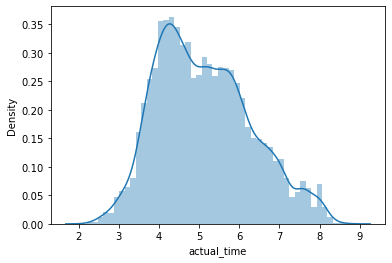

In [106]:
sns.distplot(np.log(actual_time))

<AxesSubplot:xlabel='segment_actual_time', ylabel='Density'>

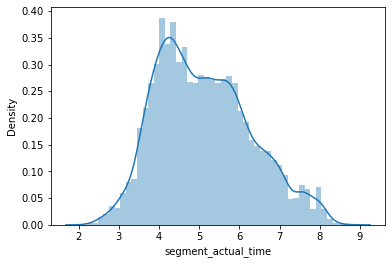

In [107]:
sns.distplot(np.log(segment_actual_time))

In [108]:
stats.ttest_ind(np.log(actual_time),np.log(segment_actual_time))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.7701458929626459, pvalue=0.4412194950197108)

# osrm distance VS segment_osrm_distance

#### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [109]:
osrm_distance = (data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["osrm_distance"].max().reset_index()).groupby("trip_uuid")["osrm_distance"].sum()

In [110]:
segment_osrm_distance = data.groupby("trip_uuid")["segment_osrm_distance"].sum()

In [111]:
osrm_distance

trip_uuid
trip-153671041653548748     991.3523
trip-153671042288605164      85.1110
trip-153671043369099517    2372.0852
trip-153671046011330457      19.6800
trip-153671052974046625     146.7918
                             ...    
trip-153861095625827784      73.4630
trip-153861104386292051      16.0882
trip-153861106442901555      63.2841
trip-153861115439069069     177.6635
trip-153861118270144424      80.5787
Name: osrm_distance, Length: 14817, dtype: float64

In [112]:
segment_osrm_distance

trip_uuid
trip-153671041653548748    1320.4733
trip-153671042288605164      84.1894
trip-153671043369099517    2545.2678
trip-153671046011330457      19.8766
trip-153671052974046625     146.7919
                             ...    
trip-153861095625827784      64.8551
trip-153861104386292051      16.0883
trip-153861106442901555     104.8866
trip-153861115439069069     223.5324
trip-153861118270144424      80.5787
Name: segment_osrm_distance, Length: 14817, dtype: float64

<AxesSubplot:xlabel='osrm_distance', ylabel='Density'>

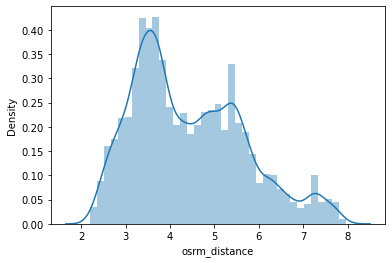

In [113]:
sns.distplot(np.log(osrm_distance))

<AxesSubplot:xlabel='segment_osrm_distance', ylabel='Density'>

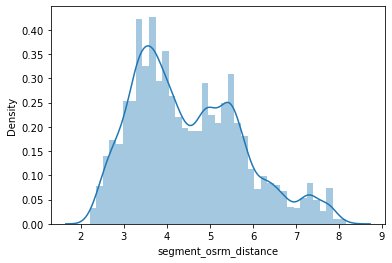

In [114]:
sns.distplot(np.log(segment_osrm_distance))

In [115]:
stats.ttest_ind(np.log(osrm_distance.sample(2000)),np.log(segment_osrm_distance.sample(2000)))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.5367910480969527, pvalue=0.12442361841385416)

In [116]:
stats.ttest_ind(osrm_distance.sample(2000),segment_osrm_distance.sample(2000))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.8577997908380889, pvalue=0.39105444414555934)

## osrm_time VS segment_osrm_time

#### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [117]:
osrm_time = ((data.groupby(["trip_uuid","time_taken_btwn_odstart_and_od_end"])["osrm_time"].max()).reset_index()).groupby("trip_uuid")["osrm_time"].sum()

In [118]:
segment_osrm_time = data.groupby("trip_uuid")["segment_osrm_time"].sum()

In [119]:
osrm_time

trip_uuid
trip-153671041653548748     743.0
trip-153671042288605164      68.0
trip-153671043369099517    1741.0
trip-153671046011330457      15.0
trip-153671052974046625     117.0
                            ...  
trip-153861095625827784      62.0
trip-153861104386292051      12.0
trip-153861106442901555      54.0
trip-153861115439069069     184.0
trip-153861118270144424      68.0
Name: osrm_time, Length: 14817, dtype: float64

In [120]:
segment_osrm_time

trip_uuid
trip-153671041653548748    1008.0
trip-153671042288605164      65.0
trip-153671043369099517    1941.0
trip-153671046011330457      16.0
trip-153671052974046625     115.0
                            ...  
trip-153861095625827784      62.0
trip-153861104386292051      11.0
trip-153861106442901555      88.0
trip-153861115439069069     221.0
trip-153861118270144424      67.0
Name: segment_osrm_time, Length: 14817, dtype: float64

<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

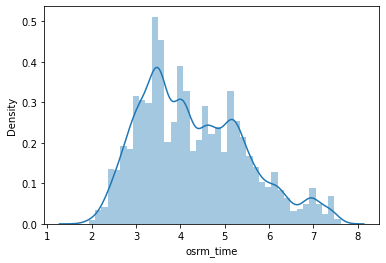

In [121]:
sns.distplot(np.log(osrm_time))

<AxesSubplot:xlabel='segment_osrm_time', ylabel='Density'>

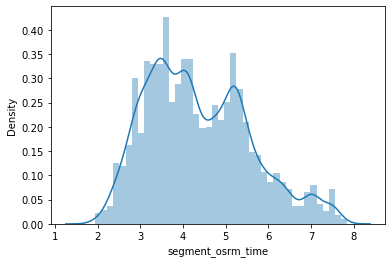

In [122]:
sns.distplot(np.log(segment_osrm_time))

In [123]:
stats.ttest_ind(osrm_time.sample(1000),segment_osrm_time.sample(1000))

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-2.3197867218886206, pvalue=0.02045274609245179)

In [124]:
# data["route_schedule_uuid"].value_counts()[600:650]

In [125]:
# t = data[data["route_schedule_uuid"]=="thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9"]

In [126]:
# t

In [127]:
# data.columns

In [128]:
# data["route_schedule_uuid"][0]

In [129]:
# data["route_schedule_uuid"].value_counts().sort_values(ascending=False)

In [130]:
data.groupby(["route_schedule_uuid","trip_uuid"])[["source_state","destination_state","segment_actual_time"]].aggregate({"source_state":pd.unique,
                                                                                              "destination_state":pd.unique,
                                                                                                    "segment_actual_time":np.sum
                                                                                              })

source_state  \
route_schedule_uuid                                trip_uuid                                
thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df0... trip-153673978559739191    Maharashtra   
                                                   trip-153708949529986248    Maharashtra   
                                                   trip-153716205423269821    Maharashtra   
                                                   trip-153725872900441053    Maharashtra   
                                                   trip-153734009199403563    Maharashtra   
...                                                                                   ...   
thanos::sroute:ffaf85f1-2f23-4367-aef7-c5804480... trip-153762673254298526         Punjab   
                                                   trip-153788646927839254         Punjab   
                                                   trip-153840968499181497         Punjab   
thanos::sroute:fffa2622-a170-4d08-b60b-38dfbae8... trip-153773775882509697  Uttar Pradesh   
                                                   trip-153791383335737867  Uttar Pradesh   

                                                                           destination_state  \
route_schedule_uuid                                trip_uuid                                   
thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df0... trip-153673978559739191       Maharashtra   
                                                   trip-153708949529986248       Maharashtra   
                                                   trip-153716205423269821       Maharashtra   
                                                   trip-153725872900441053       Maharashtra   
                                                   trip-153734009199403563       Maharashtra   
...                                                                                      ...   
thanos::sroute:ffaf85f1-2f23-4367-aef7-c5804480... trip-153762673254298526            Punjab   
                                                   trip-153788646927839254            Punjab   
                                                   trip-153840968499181497            Punjab   
thanos::sroute:fffa2622-a170-4d08-b60b-38dfbae8... trip-153773775882509697     Uttar Pradesh   
                                                   trip-153791383335737867     Uttar Pradesh   

                                                                            segment_actual_time  
route_schedule_uuid                                trip_uuid                                     
thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df0... trip-153673978559739191                201.0  
                                                   trip-153708949529986248                459.0  
                                                   trip-153716205423269821                 53.0  
                                                   trip-153725872900441053                161.0  
                                                   trip-153734009199403563                157.0  
...                                                                                         ...  
thanos::sroute:ffaf85f1-2f23-4367-aef7-c5804480... trip-153762673254298526                146.0  
                                                   trip-153788646927839254                134.0  
                                                   trip-153840968499181497                133.0  
thanos::sroute:fffa2622-a170-4d08-b60b-38dfbae8... trip-153773775882509697                168.0  
                                                   trip-153791383335737867                532.0  

[14817 rows x 3 columns]

### number of orders between cities , sorted highest to lowest

In [131]:
No_of_packages_between_cities = data.groupby(["source_city_state","destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
No_of_packages_between_cities

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,407
2,Hyderabad Telangana,Hyderabad Telangana,308
3,Mumbai Maharashtra,Bhiwandi Maharashtra,282
4,Mumbai Maharashtra,Mumbai Maharashtra,252
...,...,...,...
2335,Hyderabad Telangana,Gurgaon Haryana,1
2336,Ranikhet Uttarakhand,Pithorgarh Uttarakhand,1
2337,Hyderabad Telangana,Shamshabad Telangana,1
2338,Ranchi Jharkhand,Guwahati Assam,1


In [132]:
No_of_packages_between_cities[No_of_packages_between_cities["source_city_state"]==No_of_packages_between_cities["destination_city_state"]].head(15)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
2,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Mumbai Maharashtra,252
8,Chennai Tamil Nadu,Chennai Tamil Nadu,205
12,Ahmedabad Gujarat,Ahmedabad Gujarat,131
13,Delhi Delhi,Delhi Delhi,109
16,Pune Maharashtra,Pune Maharashtra,101
21,Jaipur Rajasthan,Jaipur Rajasthan,87
26,Surat Gujarat,Surat Gujarat,77
33,Kolkata West Bengal,Kolkata West Bengal,63


## number of routes between two cities (sorted from highest to lowest )

In [133]:
data.groupby(["source_city_state","destination_city_state"])["route_schedule_uuid"].nunique().sort_values(ascending=False).head(25)

source_city_state                     destination_city_state              
Bengaluru Karnataka                   Bengaluru Karnataka                     142
Delhi Delhi                           Gurgaon Haryana                          38
Mumbai Maharashtra                    Bhiwandi Maharashtra                     38
Bhiwandi Maharashtra                  Mumbai Maharashtra                       37
Hyderabad Telangana                   Hyderabad Telangana                      33
Chennai Tamil Nadu                    Chennai Tamil Nadu                       32
Gurgaon Haryana                       Delhi Delhi                              25
Mumbai Maharashtra                    Mumbai Maharashtra                       23
Chennai Tamil Nadu                    MAA Tamil Nadu                           21
MAA Tamil Nadu                        Chennai Tamil Nadu                       20
Delhi Delhi                           Delhi Delhi                              17
Surat Gujarat          

In [134]:
data.columns

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_day',
       'source_city', 'source_state', 'source_code', 'source_place',
       'destination_city', 'destination_state', 'destination_code',
       'destination_place', 'source_city_state', 'destination_city_state',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end'],
      dtype='object')

## average actual time taken from one city to another city : 

In [135]:
(((data.groupby(["source_city_state",
                 "destination_city_state",
                 "trip_uuid"])["segment_actual_time"].sum()).reset_index()).groupby(["source_city_state",
                                                                                     "destination_city_state"])["segment_actual_time"].mean()/60).sort_values(ascending=False)

source_city_state    destination_city_state
Chandigarh Punjab    Bengaluru Karnataka       62.516667
Guwahati Assam       Delhi Delhi               55.696078
Delhi Delhi          Guwahati Assam            54.683333
Kolkata West Bengal  Bhiwandi Maharashtra      52.353333
Gurgaon Haryana      MAA Tamil Nadu            51.514286
                                                 ...    
Attingal Kerala      Kalluvathukal Kerala       0.295000
Sonipat Haryana      Sonipat Haryana            0.286494
Nabarangpr Orissa    Pappadahandi Orissa        0.277778
Bhubaneshwar Orissa  Bhubaneshwar Orissa        0.254167
Khurdha Orissa       Khurdha Orissa             0.250000
Name: segment_actual_time, Length: 2340, dtype: float64

## highest number  of orders between two states : 

In [136]:
highest_order_between_states = data.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
highest_order_between_states

,source_state,destination_state,trip_uuid
0,Maharashtra,Maharashtra,2487
1,Karnataka,Karnataka,2129
2,Tamil Nadu,Tamil Nadu,1048
3,Haryana,Haryana,806
4,Gujarat,Gujarat,697
...,...,...,...
150,Punjab,Karnataka,1
151,Maharashtra,Punjab,1
152,Telangana,Haryana,1
153,Mizoram,Assam,1


In [137]:
highest_order_between_states[highest_order_between_states["source_state"]!=highest_order_between_states["destination_state"]].head(10)

,source_state,destination_state,trip_uuid
9,Delhi,Haryana,451
13,Haryana,Delhi,315
19,Haryana,Uttar Pradesh,140
20,Uttar Pradesh,Haryana,130
22,Chandigarh,Punjab,121
23,Delhi,Uttar Pradesh,110
25,Haryana,Punjab,103
26,Uttar Pradesh,Delhi,93
27,Andhra Pradesh,Telangana,91
28,Haryana,Rajasthan,84


# mean segment actual time taken between two cities 

In [138]:
City_time_durations = (((data.groupby(["source_city_state",
               "destination_city_state",
               "trip_uuid"])["segment_actual_time"].sum().reset_index()).groupby(["source_city_state","destination_city_state"])["segment_actual_time"].mean())/60).reset_index()

In [139]:
City_time_durations.columns = ["source_city_state","destination_city_state","average_time_between_cities"]


In [140]:
City_time_durations.sort_values(by="average_time_between_cities",ascending=False).head(10)

,source_city_state,destination_city_state,average_time_between_cities
439,Chandigarh Punjab,Bengaluru Karnataka,62.516667
838,Guwahati Assam,Delhi Delhi,55.696078
569,Delhi Delhi,Guwahati Assam,54.683333
1251,Kolkata West Bengal,Bhiwandi Maharashtra,52.353333
821,Gurgaon Haryana,MAA Tamil Nadu,51.514286
255,Bengaluru Karnataka,Kolkata West Bengal,50.172222
322,Bhiwandi Maharashtra,Kolkata West Bengal,48.366667
441,Chandigarh Punjab,Bhiwandi Maharashtra,47.783333
797,Gurgaon Haryana,Bengaluru Karnataka,47.735606
244,Bengaluru Karnataka,Gurgaon Haryana,46.076667


## highers orders delivered from and to : 

In [141]:
data.groupby(["source_city_state","destination_city_state"])["trip_uuid"].nunique().sort_values(ascending =False).head(50)

source_city_state                     destination_city_state                         
Bengaluru Karnataka                   Bengaluru Karnataka                                1369
Bhiwandi Maharashtra                  Mumbai Maharashtra                                  407
Hyderabad Telangana                   Hyderabad Telangana                                 308
Mumbai Maharashtra                    Bhiwandi Maharashtra                                282
                                      Mumbai Maharashtra                                  252
Delhi Delhi                           Gurgaon Haryana                                     248
Gurgaon Haryana                       Delhi Delhi                                         237
Mumbai Hub (Maharashtra) Maharashtra  Mumbai Maharashtra                                  227
Chennai Tamil Nadu                    Chennai Tamil Nadu                                  205
MAA Tamil Nadu                        Chennai Tamil Nadu            

## busiest Junction

In [142]:
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].count().reset_index()

In [143]:
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].count().reset_index()

In [144]:
traffic = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")

In [145]:
traffic.sort_values(by=["trip_uuid_x","trip_uuid_y"],ascending=False).head(10)

,source_city_state,trip_uuid_x,destination_city_state,trip_uuid_y
383,Gurgaon Haryana,23665,Gurgaon Haryana,15393
124,Bengaluru Karnataka,14341,Bengaluru Karnataka,15283
152,Bhiwandi Maharashtra,9088,Bhiwandi Maharashtra,5586
885,Pune Maharashtra,4269,Pune Maharashtra,3845
424,Hyderabad Telangana,4023,Hyderabad Telangana,5838
270,Delhi Delhi,3587,Delhi Delhi,5429
580,Kolkata West Bengal,2844,Kolkata West Bengal,5221
209,Chandigarh Punjab,2450,Chandigarh Punjab,2886
1066,Surat Gujarat,2362,Surat Gujarat,1185
6,Ahmedabad Gujarat,1961,Ahmedabad Gujarat,2168


# per trip_uuid analysis: 

In [146]:
data.columns

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'trip_creation_day',
       'source_city', 'source_state', 'source_code', 'source_place',
       'destination_city', 'destination_state', 'destination_code',
       'destination_place', 'source_city_state', 'destination_city_state',
       'source_pincode', 'destination_pincode',
       'time_taken_btwn_odstart_and_od_end'],
      dtype='object')

In [147]:
w = data.groupby(["trip_uuid"])[["source_city","destination_city"]].aggregate({
    "source_city":pd.unique,
    "destination_city":pd.unique
}).reset_index()

In [148]:
x = data.groupby(["trip_uuid"])[["source_state","destination_state"]].aggregate({
    "source_state":pd.unique,
    "destination_state":pd.unique
}).reset_index()

In [149]:
y = (((data.groupby(["trip_uuid",
                     "start_scan_to_end_scan"])["actual_distance_to_destination"].max()).reset_index()).groupby("trip_uuid")["actual_distance_to_destination"].sum()).reset_index()

In [150]:
z = ((((data.groupby(["trip_uuid",
                      "start_scan_to_end_scan"])["actual_time"].max()).reset_index()).groupby("trip_uuid")["actual_time"].sum())/60).reset_index()

In [151]:
final = z.merge(y.merge((w.merge(x,on = "trip_uuid")),on="trip_uuid"),on="trip_uuid")


In [152]:
routid = (data.groupby("trip_uuid")["route_schedule_uuid"].unique()).apply(lambda x:x[0])

In [153]:
final = routid.reset_index().merge(final,on="trip_uuid")

In [154]:
final.head(10)

,trip_uuid,route_schedule_uuid,actual_time,actual_distance_to_destination,source_city,destination_city,source_state,destination_state
0,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,26.033333,824.732854,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]"
1,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2.383333,73.186911,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]",Karnataka,Karnataka
2,trip-153671043369099517,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,55.783333,1932.273969,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Karnataka, Haryana]","[Haryana, Punjab]"
3,trip-153671046011330457,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0.983333,17.175274,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Maharashtra
4,trip-153671052974046625,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,5.683333,127.448500,"[Bellary, Hospet (Karnataka), Sandur]","[Hospet (Karnataka), Sandur, Bellary]",Karnataka,Karnataka
5,trip-153671055416136166,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1.016667,24.597048,Chennai,Chennai,Tamil Nadu,Tamil Nadu
6,trip-153671066201138152,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,0.400000,9.100510,Chennai,Chennai,Tamil Nadu,Tamil Nadu
7,trip-153671066826362165,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,1.066667,22.424210,"[HBR Layout PC (Karnataka), Bengaluru]","[Bengaluru, HBR Layout PC (Karnataka)]",Karnataka,Karnataka
8,trip-153671074033284934,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,2.683333,25.454848,Surat,Surat,Gujarat,Gujarat
9,trip-153671079956500691,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,0.383333,9.872146,Delhi,Delhi,Delhi,Delhi


## Route analysis : 

In [173]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()

In [174]:
A

,route_schedule_uuid,route_type
0,thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df...,[Carting]
1,thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3...,[Carting]
2,thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b...,[FTL]
3,thanos::sroute:00b294b8-d2c3-4bca-a3be-684f462...,[Carting]
4,thanos::sroute:01164881-301e-45f8-bacd-ee21c37...,[FTL]
...,...,...
1499,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,[FTL]
1500,thanos::sroute:ff6d6662-580b-43c3-810c-ba30270...,[Carting]
1501,thanos::sroute:ff9b1c17-a70d-412a-acd1-5ab51d8...,[FTL]
1502,thanos::sroute:ffaf85f1-2f23-4367-aef7-c580448...,[FTL]


In [175]:
B = data.groupby("route_schedule_uuid")[["source_city","destination_city"]].nunique().sort_values(by="source_city",ascending=False).reset_index()


In [176]:
B.columns = ["route_schedule_uuid","#source_city","#destination_city"]

In [177]:
C = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","destination_cities"]

In [178]:
D = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_cities"]


In [179]:
E = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","source_states"]
F = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
F.columns = ["route_schedule_uuid","destination_states"]
G = data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
G.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]


In [180]:
routes = G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
                                                         on="route_schedule_uuid"),
                                                 on="route_schedule_uuid"),
                                         on="route_schedule_uuid"),
                                 on="route_schedule_uuid"),
                         on="route_schedule_uuid"),
                 on="route_schedule_uuid")

In [181]:
H = final.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
# H.sort_values(by="actual_distance_to_destination",ascending=False)
H.columns = ["route_schedule_uuid",
             "average_actual_distance_covered"]

In [182]:
I = data.groupby("route_schedule_uuid")["trip_uuid"].count().reset_index()
I.columns = ["route_schedule_uuid","Total_Orders"]

In [183]:
routes = routes.merge(I.merge(H,on="route_schedule_uuid"),on="route_schedule_uuid")

## Most Ordered route : 

In [184]:
routes.sort_values(by="Total_Orders",ascending=False).head(10)

,route_schedule_uuid,#source_states,#destination_states,destination_states,source_states,source_cities,destination_cities,route_type,#source_city,#destination_city,Total_Orders,average_actual_distance_covered
19,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,2,2,"[Haryana, Karnataka]","[Punjab, Haryana]","[Chandigarh, Gurgaon]","[Gurgaon, Bengaluru]",[FTL],2,2,1812,1905.766051
1054,thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...,1,1,[Karnataka],[Haryana],[Gurgaon],[Bengaluru],[FTL],1,1,1608,1689.791894
722,thanos::sroute:dca6268f-741a-4d1a-b1b0-aab1309...,1,1,[Karnataka],[Haryana],[Gurgaon],[Bengaluru],[FTL],1,1,1605,1689.873158
21,thanos::sroute:a1b25549-1e77-498f-8538-00292e5...,2,2,"[Orissa, West Bengal]","[Karnataka, Orissa]","[Bengaluru, Bhubaneshwar]","[Bhubaneshwar, Kolkata]",[FTL],2,2,1285,1567.577507
75,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2,2,"[Haryana, Punjab]","[Karnataka, Haryana]","[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]",[FTL],2,2,1280,1869.546650
117,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,2,2,"[Bihar, Haryana]","[Haryana, Bihar]","[Gurgaon, Muzaffrpur, Purnia]","[Muzaffrpur, Purnia, Gurgaon]",[FTL],3,3,1211,2016.941915
216,thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...,1,2,"[West Bengal, Delhi]",[Assam],[Guwahati],"[Kolkata, Delhi]",[FTL],1,2,1162,1411.208424
70,thanos::sroute:69409580-4bf0-4bbf-96fe-9e7bc65...,2,2,"[Haryana, Maharashtra]","[Delhi, Haryana]","[Delhi, Gurgaon]","[Gurgaon, Pune]",[FTL],2,2,1158,1151.514940
1301,thanos::sroute:7af51efd-ae4d-49bc-9b68-345abe6...,1,1,[Haryana],[Karnataka],[Bengaluru],[Gurgaon],[FTL],1,1,1085,1694.584389
65,thanos::sroute:e2f5faaa-455a-494b-a501-549c3e3...,2,2,"[Haryana, Maharashtra]","[Punjab, Haryana]","[Chandigarh, Gurgaon]","[Gurgaon, Bhiwandi]",[FTL],2,2,1069,1170.817927


## Maximum City Covering routes : 

In [168]:
routes.sort_values(by=["#source_city","#destination_city"],ascending=False).head(7)

,route_schedule_uuid,#source_states,#destination_states,destination_states,source_states,source_cities,destination_cities,route_type,#source_city,#destination_city,Total_Orders,average_actual_distance_covered
102,thanos::sroute:d010efca-d90d-4977-b987-eae68c5...,2,2,"[Assam, Arunachal Pradesh]","[Assam, Arunachal Pradesh]","[Guwahati, LakhimpurN, Dhemaji, Likabali, Tezp...","[Tezpur, Dhemaji, Silapathar, Pasighat, Mangal...",[FTL],13,11,204,281.596486
105,thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...,2,2,"[Assam, Meghalaya]","[Assam, Meghalaya]","[Guwahati, Rangia, Kokrajhar, Dhubri, Bilasipa...","[Rangia, Nalbari, Dhubri, Bilasipara, Lakhipur...",[FTL],10,10,230,332.602225
151,thanos::sroute:ae5c430f-6153-48d1-8fe5-d5f0bbc...,1,1,[Rajasthan],[Rajasthan],"[Jaipur, Chomu, Reengus, Sikar, Bikaner, Didwa...","[Chomu, Reengus, Sikar, Bikaner, Nokha, Sujang...",[FTL],10,10,372,351.611796
601,thanos::sroute:f8968c72-5222-4d81-9eed-8a6d88f...,1,2,"[Karnataka, Goa]",[Karnataka],"[Mangalore, Udupi (Karnataka), Kundapura, Bhat...","[Uchila, Kundapura, Bhatkal, Honnavar, Kumta, ...",[FTL],9,9,100,195.257193
452,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,1,1,[Rajasthan],[Rajasthan],"[Ajmer, Beawar, Bilara, Bijainagar, Kekri, Nas...","[Beawar, Bilara, Badnaur, Kekri, Nasirabad, Aj...",[FTL],9,8,204,178.737233
568,thanos::sroute:fcd09ac0-86d2-44d0-92ee-11c0e0b...,1,1,[Uttar Pradesh],[Uttar Pradesh],"[Mainpuri, Farrukhbad, Shahabad, Tilhar, Jalal...","[Farrukhbad, Shahabad, Shahjhnpur, Jalalabad, ...",[FTL],8,8,153,207.247057
33,thanos::sroute:449c95d6-7baf-4c59-ac16-180c22a...,2,2,"[Telangana, Andhra Pradesh]","[Telangana, Andhra Pradesh]","[Hyderabad, Vijayawada, Khammam, Suryapet, Nal...","[Choutuppal, Khammam, Suryapet, Nalgonda, Hyde...",[FTL],7,7,152,420.603709


# longest route : average distance of a route 

In [169]:
routes.sort_values(by=["average_actual_distance_covered"],ascending=False).head(7)

,route_schedule_uuid,#source_states,#destination_states,destination_states,source_states,source_cities,destination_cities,route_type,#source_city,#destination_city,Total_Orders,average_actual_distance_covered
60,thanos::sroute:3592c86e-c3d1-429b-917a-ebe9051...,2,2,"[West Bengal, Maharashtra]","[Assam, West Bengal]","[Guwahati, Kolkata]","[Kolkata, Bhiwandi]",[FTL],2,2,498,2157.968312
117,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,2,2,"[Bihar, Haryana]","[Haryana, Bihar]","[Gurgaon, Muzaffrpur, Purnia]","[Muzaffrpur, Purnia, Gurgaon]",[FTL],3,3,1211,2016.941915
85,thanos::sroute:b3fd32d8-4027-4dc5-a425-eb8ccb8...,2,2,"[Haryana, Punjab]","[Karnataka, Haryana]","[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]",[FTL],2,2,135,1939.975142
19,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,2,2,"[Haryana, Karnataka]","[Punjab, Haryana]","[Chandigarh, Gurgaon]","[Gurgaon, Bengaluru]",[FTL],2,2,1812,1905.766051
75,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2,2,"[Haryana, Punjab]","[Karnataka, Haryana]","[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]",[FTL],2,2,1280,1869.546650
114,thanos::sroute:824ae884-8323-4beb-b955-27c6772...,2,2,"[Bihar, Haryana]","[Haryana, Bihar]","[Gurgaon, Muzaffrpur, Purnia]","[Muzaffrpur, Purnia, Gurgaon]",[FTL],3,3,617,1775.691335
78,thanos::sroute:65298ce5-d9ee-4614-80fe-0b619cf...,2,2,"[Rajasthan, Delhi]","[Karnataka, Rajasthan]","[Bengaluru, Jaipur]","[Jaipur, Delhi]",[FTL],2,2,648,1765.535376


In [170]:
routes["route_type"] = routes["route_type"].apply(lambda x:x[0])

<AxesSubplot:>

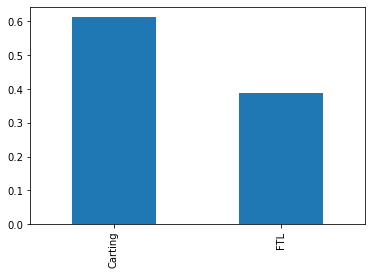

In [171]:
routes["route_type"].value_counts(normalize=True).plot(kind = "bar")

In [172]:
# routes[routes["route_type"]!="FTL"].sort_values(by=["average_actual_distance_covered"],ascending=False).head(7)